In [1]:
import numpy as np
from numpy import random, fft
from matplotlib import pyplot as plt

plt.rcParams['font.family'] = 'serif'

/home/johannes/.local/share/workon/cosmology/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in reciprocal
/home/johannes/.local/share/workon/cosmology/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in power


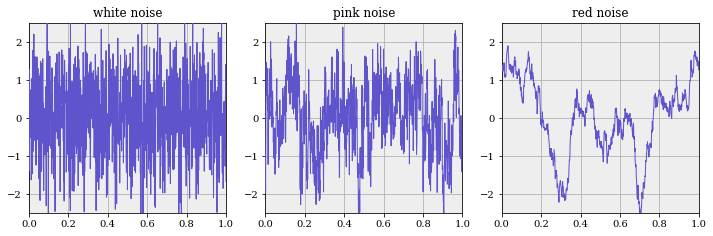

In [27]:
N = 1024
k = fft.fftfreq(N, 1.0 / (2 * np.pi * N))
x = np.linspace(0, 1, N)
y1 = random.normal(0, 1, N)
sample = np.r_[[0], y1, [0]]

plt.rcParams['font.family'] = 'serif'

fig, axes = plt.subplots(1, 3, figsize=(12, 3.5))
ax = axes[0]
ax.set_facecolor('#eeeeee')
ax.plot(x, y1, color='#6054cc', zorder=10, linewidth=1)
# ax.plot(x, sample, marker='.', markersize=1.0)
ax.set_xlim(0, 1)
ax.set_ylim(-2.5, 2.5)
ax.set_title('white noise')
ax.grid(zorder=-10)
# fig.savefig('white-noise.pdf', bbox_inches='tight')

y1 = random.normal(0, 1, N)
power = np.abs(k)**-1 ; power[0] = 0 ; power /= power.sum()
y2 = fft.ifft(fft.fft(y1) * np.sqrt(power * N)).real
x  = np.linspace(0, 1, N)
sample = np.r_[[0], y2, [0]]

ax = axes[1]
# fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.set_facecolor('#eeeeee')
ax.plot(x, y2, color='#6054cc', zorder=10, linewidth=1)
# ax.plot(x, sample, marker='.', markersize=1.0)
ax.set_xlim(0, 1)
ax.set_ylim(-2.5, 2.5)
ax.set_title('pink noise')
ax.grid(zorder=-10)

power = np.abs(k)**-2 ; power[0] = 0 ; power /= power.sum()
y1 = random.normal(0, 1, N)
y2 = fft.ifft(fft.fft(y1) * np.sqrt(power * N)).real
x  = np.linspace(0, 1, N)
sample = np.r_[[0], y2, [0]]

ax = axes[2]
# fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.set_facecolor('#eeeeee')
ax.plot(x, y2, color='#6054cc', zorder=10, linewidth=1)
# ax.plot(x, sample, marker='.', markersize=1.0)
ax.set_xlim(0, 1)
ax.set_ylim(-2.5, 2.5)
ax.set_title('red noise')
ax.grid(zorder=-10)
fig.savefig('../figures/noise.svg', bbox_inches='tight')

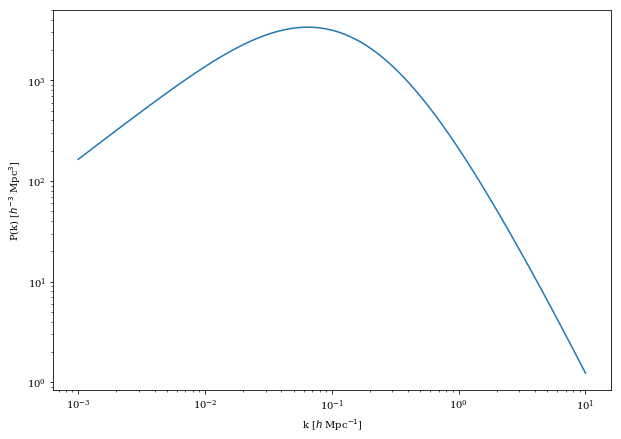

In [26]:
from cosmology import Planck2018

cosmology = Planck2018
cosmology.normalise(from_zero=True)
k = np.logspace(-3, 1, 100)

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.loglog(k, cosmology.P(k))
ax.set_xlabel("k [$h$ Mpc$^{-1}$]")
ax.set_ylabel("P(k) [$h^{-3}$ Mpc$^{3}$]")
# ax.loglog(kx, cosmology.P(kx), marker='+')
plt.show()
fig.savefig('../figures/power-spectrum.svg', bbox_inches='tight')